In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("../data/raw/charging_sessions.csv")
df.shape[0]

66450

In [27]:
# add a new column "connection_duration" to the dataframe. It shall hold the duration for which the EV was connected but done charging. calculation in = disconnectTime - doneChargingTime
df['connectionTime'] = pd.to_datetime(df['connectionTime'])
df['doneChargingTime'] = pd.to_datetime(df['doneChargingTime'])
df['DCTpreConnectionTimeOffset'] = df['doneChargingTime'] - df['connectionTime']


In [28]:

sessions_with_negative_DCTpreConnectionTimeOffset = df[df['DCTpreConnectionTimeOffset'] < pd.Timedelta(0)].copy()


sessions_with_negative_DCTpreConnectionTimeOffset['DCTpreConnectionTimeOffset_in_minutes'] = sessions_with_negative_DCTpreConnectionTimeOffset['DCTpreConnectionTimeOffset'].dt.total_seconds() / 60


In [29]:
sessions_with_negative_DCTpreConnectionTimeOffset['DCTpreConnectionTimeOffset_in_minutes'].describe()

count    27.000000
mean     -4.943827
std      11.794448
min     -41.366667
25%      -1.000000
50%      -0.983333
75%      -0.958333
max      -0.016667
Name: DCTpreConnectionTimeOffset_in_minutes, dtype: float64

In [32]:
#remove ids 5c2e85daf9af8b13dab07564, 5c2e85daf9af8b13dab07565,5c2e85daf9af8b13dab07566
sessions_with_negative_DCTpreConnectionTimeOffset = sessions_with_negative_DCTpreConnectionTimeOffset[~sessions_with_negative_DCTpreConnectionTimeOffset['id'].isin(['5c2e85daf9af8b13dab07564', '5c2e85daf9af8b13dab07565','5c2e85daf9af8b13dab07566'])]


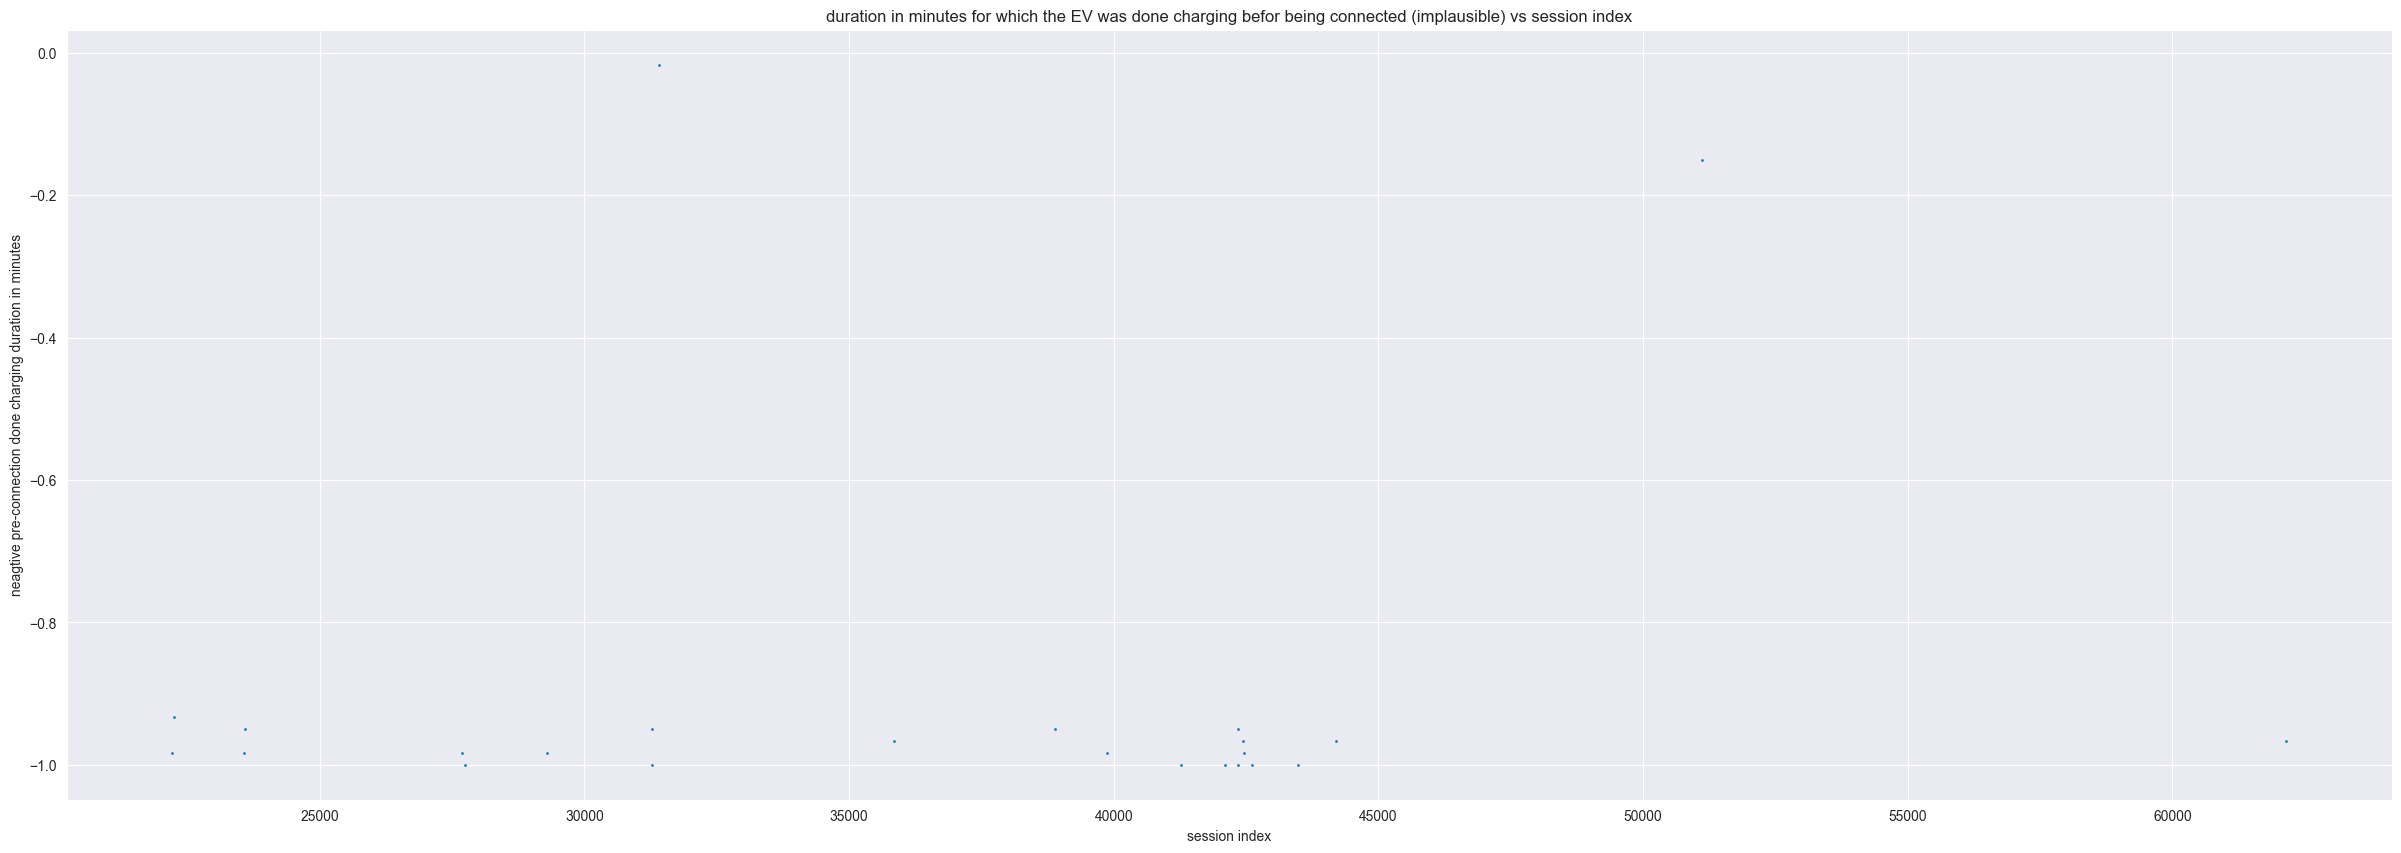

In [33]:
#plot connection_duration vs session index
plt.figure(figsize=(30,10))
#type scatter plot
plt.scatter(sessions_with_negative_DCTpreConnectionTimeOffset.index, sessions_with_negative_DCTpreConnectionTimeOffset['DCTpreConnectionTimeOffset_in_minutes'], s=1)
plt.xlabel('session index')
plt.ylabel('neagtive pre-connection done charging duration in minutes')
plt.title('duration in minutes for which the EV was done charging befor being connected (implausible) vs session index')
plt.show()


In [31]:
sessions_with_negative_DCTpreConnectionTimeOffset.head(27)

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs,DCTpreConnectionTimeOffset,DCTpreConnectionTimeOffset_in_minutes
22219,2040,5c942ca4f9af8b06b04b3bb4,2019-03-05 19:13:55+00:00,2019-03-05 22:50:39+00:00,2019-03-05 19:12:56+00:00,0.706655,2_39_78_367_2019-03-05 19:13:55.113078,2,CA-494,2-39-78-367,America/Los_Angeles,NaN,NaN,-1 days +23:59:01,-0.983333
22253,2074,5c957e1cf9af8b42f440af03,2019-03-06 20:26:30+00:00,2019-03-07 01:48:54+00:00,2019-03-06 20:25:34+00:00,1.046381,2_39_78_367_2019-03-06 20:26:30.479644,2,CA-494,2-39-78-367,America/Los_Angeles,NaN,NaN,-1 days +23:59:04,-0.933333
23562,3383,5cca3a22f9af8b49aaa4cba0,2019-04-15 20:24:13+00:00,2019-04-15 23:39:04+00:00,2019-04-15 20:23:14+00:00,0.635278,2_39_78_367_2019-04-15 20:24:13.365605,2,CA-494,2-39-78-367,America/Los_Angeles,1154.0,"[{'WhPerMile': 308, 'kWhRequested': 9.24, 'mil...",-1 days +23:59:01,-0.983333
23586,3407,5ccb8ba6f9af8b4d9721df00,2019-04-16 16:11:08+00:00,2019-04-16 19:10:48+00:00,2019-04-16 16:10:11+00:00,0.585977,2_39_78_367_2019-04-16 16:11:07.939710,2,CA-494,2-39-78-367,America/Los_Angeles,1154.0,"[{'WhPerMile': 308, 'kWhRequested': 6.16, 'mil...",-1 days +23:59:03,-0.950000
27689,7510,5d856f1ff9af8b0c7bdf245c,2019-09-04 16:35:04+00:00,2019-09-05 00:44:27+00:00,2019-09-04 16:34:05+00:00,1.584500,2_39_78_367_2019-09-04 16:35:04.129327,2,CA-494,2-39-78-367,America/Los_Angeles,NaN,NaN,-1 days +23:59:01,-0.983333
27740,7561,5d86c0a5f9af8b1022a81870,2019-09-05 18:44:57+00:00,2019-09-06 00:55:19+00:00,2019-09-05 18:43:57+00:00,1.067230,2_39_78_360_2019-09-05 18:44:57.410168,2,CA-322,2-39-78-360,America/Los_Angeles,NaN,NaN,-1 days +23:59:00,-1.000000
29295,9116,5dcdffbdf9af8b220a19be8b,2019-10-29 17:22:32+00:00,2019-10-31 01:57:20+00:00,2019-10-29 17:21:33+00:00,6.316210,2_39_78_367_2019-10-29 17:22:32.086306,2,CA-494,2-39-78-367,America/Los_Angeles,1470.0,"[{'WhPerMile': 292, 'kWhRequested': 14.6, 'mil...",-1 days +23:59:01,-0.983333
31285,492,5bc91740f9af8b0dc677b860,2018-05-04 19:08:37+00:00,2018-05-04 22:07:47+00:00,2018-05-04 19:07:40+00:00,0.551722,2_39_78_363_2018-05-04 19:08:36.642114,2,CA-320,2-39-78-363,America/Los_Angeles,NaN,NaN,-1 days +23:59:03,-0.950000
31287,494,5bc91740f9af8b0dc677b862,2018-05-04 19:23:52+00:00,2018-05-05 00:04:15+00:00,2018-05-04 19:22:52+00:00,0.912297,2_39_78_367_2018-05-04 19:23:51.897392,2,CA-494,2-39-78-367,America/Los_Angeles,NaN,NaN,-1 days +23:59:00,-1.000000
31403,610,5bc917d0f9af8b0dc677b8d6,2018-05-07 20:47:51+00:00,2018-05-08 02:16:00+00:00,2018-05-07 20:47:50+00:00,14.967000,2_39_139_567_2018-05-07 20:47:50.862655,2,CA-513,2-39-139-567,America/Los_Angeles,NaN,NaN,-1 days +23:59:59,-0.016667
